## Intra-tumoral  
#### train에 쓸 (best의 앞뒤 영상 포함하여 80*3개의 데이터 사용)   
- image 폴더 : '.TCIA/train_image'   
- mask 폴더 : '.TCIA/train_mask'     
( 전체를 random sample 80%한 training_data와 merge해서 train으로 이용 )  

#### test에 쓸 (best만 사용하여 20개의 데이터 사용)   
- image 폴더 : '.TCIA/best_image'    
- mask 폴더 : '.TCIA/best_mask'     
( 전체를 random sample 20%한 testing_data와 merge해서 test로 이용 )  

In [7]:
import os
import random
import SimpleITK as sitk
from radiomics import firstorder
import pandas as pd
import numpy as np
from radiomics import featureextractor
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
random.seed(42)

## 1.  데이터 로드

In [9]:
org=pd.read_csv('./label.csv',sep=',') # 환자 정보 데이터 
df=pd.DataFrame(org[['PatientID','recurrence']]) # 환자ID와 재발정보 사용 / 데이터프레임 형태로 변경
df['PatientID']=df['PatientID'].str.slice(start=-3) # 다른 데이터와 합병을 위해 PatientID slice 
df=df.set_index('PatientID')
df # total:100 -'recurrence' : 68 , 'non-recurrence' : 32

,recurrence
PatientID,
004,1
005,1
006,1
007,1
008,1
...,...
285,1
288,1
290,1


In [10]:
training_data = df.sample(frac=0.8, random_state=42) # 80: 55(1), 25(0)
testing_data = df.drop(training_data.index) # 20: 13(1), 7(0)

## 2. train data

- 80개 데이터에 앞뒤 영상까지 추가해 데이터 증대(80*3)

In [11]:
image=[]
mask=[]
for x in os.listdir(os.path.join('./TCIA','train_image')): # train_image 내의 파일명 로드 
    image.append(os.path.join('./TCIA','train_image',x)) 

for x in os.listdir(os.path.join('./TCIA','train_mask')):
    if ('Store' not in x): # 경로내에 존재하는 상관없는 파일 제외 
        mask.append(os.path.join('./TCIA','train_mask',x))

In [12]:
patientId=[]
for i in range(len(mask)):
    patientId.append(image[i][-10:-7]) # image의 환자명 리스트에 저장(mask로 해도 동일)

### 2-1. feature extraction[특징추출]

In [13]:
train_list=[]
for i in range(len(image)):
    featureName=[]
    featureValue=[]
    
    img = sitk.ReadImage(image[i])
    msk = sitk.ReadImage(mask[i])

    settings = {'label': 2}
    # radiomics Package - 특징추출 (2차원 이미지 사용시 force2D=True, force2Ddimension=0 요소 추가)
    extractor = featureextractor.RadiomicsFeatureExtractor(force2D=True, force2Ddimension=0, additionalInfo=True,**settings)
    extractor.enableAllFeatures() # 모든 특징 추출
    result = extractor.execute(img, msk, label=255)
    
    for key, value in result.items():
        if (key.startswith('original')): # 특징명은 original-로 시작 
            featureName.append(key)
            featureValue.append(value)
    
    train=pd.DataFrame([featureValue], columns=featureName) 
    train_list.append(train)# 환자image&mask별로 특징값 추출해서 한줄씩 리스트에추가 
    

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

In [14]:
patient_features=train_list[0]
for i in range(1,len(train_list)):
    patient_features=pd.concat([patient_features,train_list[i]])
patient_features # 리스트 값들 concat으로 행방향 합치기 

,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.530388,118.755143,123.82245353731285,5678.5,62.986328,388.55129855222145,0.06842498873861433,5679.0,0.687501,228.0,...,4.623704105698914,0.019434290810545547,5.402831438531505,0.07061102306744145,544.3652464847855,1.393636402491799,0.010885462090645096,1.239220949315655,0.0011808089828581607,0.3560105718539682
0,0.489610,148.410853,155.90060936378666,8046.5,72.663470,444.30865786510213,0.05521762976015686,8047.0,0.715688,211.0,...,6.026849313093829,0.008230169039874233,5.594005957047829,0.07145520069591152,641.7964945179583,1.4676650768202688,0.007862510131030436,1.8083770273704032,0.0011680601984726303,0.3690051715402778
0,0.855104,129.366568,137.63720427268203,10872.5,110.621851,450.1665222413711,0.041404140928155544,10873.0,0.821101,231.0,...,7.163994896784616,0.017409328201868798,5.8685281803682185,0.06971397038535823,640.6690377399209,2.463729583530277,0.004457211608918933,2.17257877140648,0.0016076631401766555,0.2629574008870762
0,0.460883,118.283406,119.09659944767525,5045.5,54.514847,330.75230867899796,0.06555392105420632,5046.0,0.761297,223.0,...,1.0430971571030299,0.0365449939261845,5.127868858428652,0.08977407847800238,218.9320936216248,10.870548224384775,0.0059126461024694614,0.46581276261007337,0.0019902448883205,0.03367300406155839
0,0.704180,55.881065,56.71860364994893,1660.5,39.350301,177.84062043356613,0.10710064464532738,1661.0,0.812257,174.0,...,8.213319892361726,0.027445011874389077,4.4250483188504255,0.1300421432871764,114.76026663237312,0.49340590462546047,0.021530883401386997,3.9540812065207476,0.01191786790943704,1.0326899212424283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.763587,53.759445,57.723478758647246,1655.5,41.049992,181.49747468305853,0.10963302608460194,1656.0,0.794692,181.0,...,4.70040602084183,0.02481392441498627,4.7526036382749695,0.17753623188405798,57.91947799527975,1.291214278999812,0.015069957911500398,3.4488667901260452,0.010059642624872477,0.3432276731509469
0,0.856101,53.031532,55.758407437802596,1842.5,45.400322,182.66904755831234,0.09914195254182488,1843.0,0.832998,151.20000000000002,...,5.563849521071445,0.021954831595680537,4.673003282545468,0.20347259902333154,51.395384888888884,0.9767125054410036,0.015210161014781006,5.462556401210292,0.015334609408945616,0.39211057721890014
0,0.647568,111.354888,117.79643458101778,5998.5,72.109840,386.894444302729,0.06449853201679237,5999.0,0.709633,224.0,...,7.374579783165775,0.01185955768835063,5.496220175437672,0.06884480746791131,648.5641236097999,1.1020214303403055,0.010060271068880742,1.6929813534862417,0.0009960899345172857,0.536563059017299
0,0.881892,42.202426,46.04345773288535,1147.5,37.217997,173.84062043356616,0.15149509405975264,1148.0,0.690765,130.0,...,6.082266762845292,0.021767487740365046,4.7204659973993905,0.3083623693379791,7.438156340770532,1.395651765589782,0.015449939101938646,8.047401155145588,0.031903442862809425,0.3682889363455847


In [15]:
patient_features['PatientID']=patientId # patientId 열 추가
patient_features=patient_features.set_index('PatientID') # patientId를 index로 설정

In [16]:
patient_features.columns=patient_features.columns.str.replace('original','intra') # 변수명 original를 intra로 변경  
patient_features_intra=patient_features.astype(float) # 데이터 타입 float로 설정 (안하면 오류뜸)
patient_features_intra

,intra_shape2D_Elongation,intra_shape2D_MajorAxisLength,intra_shape2D_MaximumDiameter,intra_shape2D_MeshSurface,intra_shape2D_MinorAxisLength,intra_shape2D_Perimeter,intra_shape2D_PerimeterSurfaceRatio,intra_shape2D_PixelSurface,intra_shape2D_Sphericity,intra_firstorder_10Percentile,...,intra_glszm_SmallAreaHighGrayLevelEmphasis,intra_glszm_SmallAreaLowGrayLevelEmphasis,intra_glszm_ZoneEntropy,intra_glszm_ZonePercentage,intra_glszm_ZoneVariance,intra_ngtdm_Busyness,intra_ngtdm_Coarseness,intra_ngtdm_Complexity,intra_ngtdm_Contrast,intra_ngtdm_Strength
PatientID,,,,,,,,,,,,,,,,,,,,,
099,0.530388,118.755143,123.822454,5678.5,62.986328,388.551299,0.068425,5679.0,0.687501,228.0,...,4.623704,0.019434,5.402831,0.070611,544.365246,1.393636,0.010885,1.239221,0.001181,0.356011
239,0.489610,148.410853,155.900609,8046.5,72.663470,444.308658,0.055218,8047.0,0.715688,211.0,...,6.026849,0.008230,5.594006,0.071455,641.796495,1.467665,0.007863,1.808377,0.001168,0.369005
173,0.855104,129.366568,137.637204,10872.5,110.621851,450.166522,0.041404,10873.0,0.821101,231.0,...,7.163995,0.017409,5.868528,0.069714,640.669038,2.463730,0.004457,2.172579,0.001608,0.262957
225,0.460883,118.283406,119.096599,5045.5,54.514847,330.752309,0.065554,5046.0,0.761297,223.0,...,1.043097,0.036545,5.127869,0.089774,218.932094,10.870548,0.005913,0.465813,0.001990,0.033673
063,0.704180,55.881065,56.718604,1660.5,39.350301,177.840620,0.107101,1661.0,0.812257,174.0,...,8.213320,0.027445,4.425048,0.130042,114.760267,0.493406,0.021531,3.954081,0.011918,1.032690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.763587,53.759445,57.723479,1655.5,41.049992,181.497475,0.109633,1656.0,0.794692,181.0,...,4.700406,0.024814,4.752604,0.177536,57.919478,1.291214,0.015070,3.448867,0.010060,0.343228
078,0.856101,53.031532,55.758407,1842.5,45.400322,182.669048,0.099142,1843.0,0.832998,151.2,...,5.563850,0.021955,4.673003,0.203473,51.395385,0.976713,0.015210,5.462556,0.015335,0.392111
099,0.647568,111.354888,117.796435,5998.5,72.109840,386.894444,0.064499,5999.0,0.709633,224.0,...,7.374580,0.011860,5.496220,0.068845,648.564124,1.102021,0.010060,1.692981,0.000996,0.536563


In [17]:
patient_features_intra_train=pd.merge(training_data,patient_features_intra,on='PatientID') # 앞에서 지정한 training_data의 PatientID와 merge
patient_features_intra_train # 240(80*3)개 데이터 중 mask 이미지가 없는 4개 데이터 제외  

,recurrence,intra_shape2D_Elongation,intra_shape2D_MajorAxisLength,intra_shape2D_MaximumDiameter,intra_shape2D_MeshSurface,intra_shape2D_MinorAxisLength,intra_shape2D_Perimeter,intra_shape2D_PerimeterSurfaceRatio,intra_shape2D_PixelSurface,intra_shape2D_Sphericity,...,intra_glszm_SmallAreaHighGrayLevelEmphasis,intra_glszm_SmallAreaLowGrayLevelEmphasis,intra_glszm_ZoneEntropy,intra_glszm_ZonePercentage,intra_glszm_ZoneVariance,intra_ngtdm_Busyness,intra_ngtdm_Coarseness,intra_ngtdm_Complexity,intra_ngtdm_Contrast,intra_ngtdm_Strength
PatientID,,,,,,,,,,,,,,,,,,,,,
250,0,0.689679,38.198385,40.459857,768.5,26.344618,122.284271,0.159121,769.0,0.803630,...,3.537805,0.024444,4.028454,0.184655,47.989337,0.601256,0.038710,2.439998,0.013788,0.731964
250,0,0.588182,39.828911,41.109610,680.5,23.426632,120.526912,0.177115,681.0,0.767247,...,2.362107,0.046758,4.214311,0.192364,36.708700,1.118233,0.031340,1.786578,0.017881,0.403608
250,0,0.561224,32.498230,35.846897,442.5,18.238779,102.284271,0.231151,443.0,0.729042,...,2.495332,0.078180,3.784140,0.214447,22.960222,0.795578,0.048948,1.823860,0.020467,0.554122
131,1,0.557147,61.334509,65.802736,1619.5,34.172318,185.497475,0.114540,1620.0,0.769055,...,7.034090,0.025736,5.116750,0.158025,70.556396,0.899623,0.014675,4.664035,0.012421,0.604594
131,1,0.771689,57.416307,62.265560,1907.5,44.307510,190.669048,0.099958,1908.0,0.812002,...,4.653505,0.025395,4.677571,0.139937,125.038589,1.022230,0.017361,2.671836,0.008223,0.391447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1,0.890817,74.191351,79.630396,3711.5,66.090946,268.468037,0.072334,3712.0,0.804428,...,7.425295,0.017129,5.414783,0.279095,10.868592,3.106743,0.006606,8.468615,0.036843,0.193034
284,1,0.783703,61.424312,61.032778,2146.5,48.138421,218.568542,0.101826,2147.0,0.751420,...,4.696928,0.018472,5.088680,0.241733,10.464908,2.431955,0.009804,4.742596,0.018258,0.238875
151,1,0.803645,77.819069,80.131143,3775.5,62.538903,265.195959,0.070241,3776.0,0.821344,...,6.219554,0.017846,5.268959,0.076271,427.633488,0.694496,0.016068,1.981606,0.002057,0.638694


### 2-2. feature selection[특징선택] - ReliefF 사용

In [18]:
from skrebate import ReliefF

feature, labels = patient_features_intra_train.drop('recurrence',axis=1).values, patient_features_intra_train['recurrence'].values
fs=ReliefF() 
fs.fit(feature, labels)

important_features_dict_reliefF={} # 특징별 중요도를 딕셔너리로 저장 
for idx, val in zip(patient_features_intra_train.drop('recurrence',axis=1).columns, fs.feature_importances_):
    important_features_dict_reliefF[idx] = val

In [19]:
# 중요도 순서로 특징값 정렬 
important_features_dict_reliefF=sorted(important_features_dict_reliefF.items(), key=(lambda x:x[1]), reverse=True)
important_features_dict_reliefF

[('intra_firstorder_10Percentile', 0.0586702150617356),
 ('intra_firstorder_RobustMeanAbsoluteDeviation', 0.05388306091661043),
 ('intra_firstorder_MeanAbsoluteDeviation', 0.04883816913088127),
 ('intra_firstorder_InterquartileRange', 0.04792142729051479),
 ('intra_glcm_JointEntropy', 0.0447974358800292),
 ('intra_firstorder_Entropy', 0.04398500822760087),
 ('intra_gldm_DependenceNonUniformityNormalized', 0.04346234746928934),
 ('intra_glcm_SumEntropy', 0.0430342364393379),
 ('intra_firstorder_Uniformity', 0.042978173484679215),
 ('intra_gldm_DependenceEntropy', 0.04204626779917065),
 ('intra_gldm_DependenceVariance', 0.04154185480986923),
 ('intra_glcm_JointEnergy', 0.040799962551649346),
 ('intra_glcm_MaximumProbability', 0.04052916752793377),
 ('intra_gldm_GrayLevelVariance', 0.039383069536545946),
 ('intra_firstorder_Mean', 0.03901627767294069),
 ('intra_glcm_DifferenceEntropy', 0.03895210189072024),
 ('intra_firstorder_Variance', 0.03860760414917587),
 ('intra_glcm_SumSquares', 0.

In [20]:
# 중요도 순서로 정렬된 특징들의 이름만 reliefF_list로 저장 
reliefF_list=list(list(zip(*important_features_dict_reliefF))[0]) # important_features_dict_reliefF 내부 tuple의 첫번째 element를 list로 받아주는 코드
reliefF_list.append('recurrence')
reliefF_list

['intra_firstorder_10Percentile',
 'intra_firstorder_RobustMeanAbsoluteDeviation',
 'intra_firstorder_MeanAbsoluteDeviation',
 'intra_firstorder_InterquartileRange',
 'intra_glcm_JointEntropy',
 'intra_firstorder_Entropy',
 'intra_gldm_DependenceNonUniformityNormalized',
 'intra_glcm_SumEntropy',
 'intra_firstorder_Uniformity',
 'intra_gldm_DependenceEntropy',
 'intra_gldm_DependenceVariance',
 'intra_glcm_JointEnergy',
 'intra_glcm_MaximumProbability',
 'intra_gldm_GrayLevelVariance',
 'intra_firstorder_Mean',
 'intra_glcm_DifferenceEntropy',
 'intra_firstorder_Variance',
 'intra_glcm_SumSquares',
 'intra_ngtdm_Contrast',
 'intra_glcm_ClusterTendency',
 'intra_glcm_Id',
 'intra_glcm_DifferenceAverage',
 'intra_gldm_SmallDependenceEmphasis',
 'intra_glcm_Idm',
 'intra_glrlm_RunPercentage',
 'intra_glszm_ZonePercentage',
 'intra_gldm_LargeDependenceEmphasis',
 'intra_firstorder_RootMeanSquared',
 'intra_glcm_InverseVariance',
 'intra_ngtdm_Complexity',
 'intra_glcm_Contrast',
 'intra_gl

In [21]:
# reliefF_list를 이용해서 특징값 중요도 순서로 데이터 재정렬
patient_features_intra_train=patient_features_intra_train[reliefF_list]
patient_features_intra_train

,intra_firstorder_10Percentile,intra_firstorder_RobustMeanAbsoluteDeviation,intra_firstorder_MeanAbsoluteDeviation,intra_firstorder_InterquartileRange,intra_glcm_JointEntropy,intra_firstorder_Entropy,intra_gldm_DependenceNonUniformityNormalized,intra_glcm_SumEntropy,intra_firstorder_Uniformity,intra_gldm_DependenceEntropy,...,intra_glszm_GrayLevelNonUniformity,intra_glrlm_LongRunHighGrayLevelEmphasis,intra_glszm_LargeAreaHighGrayLevelEmphasis,intra_glrlm_LongRunEmphasis,intra_glszm_LargeAreaEmphasis,intra_glrlm_LongRunLowGrayLevelEmphasis,intra_glszm_LargeAreaLowGrayLevelEmphasis,intra_ngtdm_Busyness,intra_shape2D_Elongation,recurrence
PatientID,,,,,,,,,,,,,,,,,,,,,
250,173.8,12.934749,21.421470,26.00,2.208903,1.639827,0.532299,1.966279,0.441840,2.299817,...,32.028169,2669.408451,2669.408451,77.316901,77.316901,2.500732,2.500732,0.601256,0.689679,0
250,188.0,8.072490,15.841121,16.00,2.117787,1.494682,0.522875,1.845018,0.464949,2.227720,...,33.442748,1521.511450,1521.511450,63.732824,63.732824,3.104177,3.104177,1.118233,0.588182,0
250,175.2,13.934228,20.324333,35.00,2.312891,1.683575,0.497577,2.008172,0.394718,2.501142,...,22.936842,1023.610526,1023.610526,44.705263,44.705263,2.361582,2.361582,0.795578,0.561224,0
131,170.0,9.938241,22.964176,16.25,2.269777,1.654881,0.573174,2.008540,0.477403,2.435155,...,57.140625,5189.570312,5189.570312,110.601562,110.601562,3.782793,3.782793,0.899623,0.557147,1
131,180.0,9.768869,19.358870,18.00,2.030152,1.494781,0.601407,1.816971,0.517042,2.108752,...,57.719101,6198.322097,6198.322097,176.104869,176.104869,5.660643,5.660643,1.022230,0.771689,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,101.0,34.990773,44.894697,84.00,4.155986,2.917565,0.470471,3.637555,0.151346,4.007719,...,142.737452,1077.547297,1077.547297,23.706564,23.706564,1.537288,1.537288,3.106743,0.890817,1
284,150.0,19.067193,26.179600,44.00,3.230650,2.268701,0.483114,2.902607,0.242226,3.307392,...,104.556840,980.019268,980.019268,27.578035,27.578035,1.014181,1.014181,2.431955,0.783703,1
151,221.0,2.467243,10.546802,5.00,1.108511,0.816777,0.751707,0.980880,0.770886,1.261634,...,68.041667,29242.333333,29242.333333,599.534722,599.534722,12.541908,12.541908,0.694496,0.803645,1


In [22]:
patient_features_intra_train.to_csv("patient_features_intra_train.csv", index=True)

- 중요도 상위 15개의 종양 내부 라디오믹스 특징 시각화 

In [23]:
important_features_name_top15=[]
important_features_value_top15=[]
for i in range(15):
    important_features_name_top15.append(important_features_dict_reliefF[i][0][6:])
    important_features_value_top15.append(important_features_dict_reliefF[i][1])

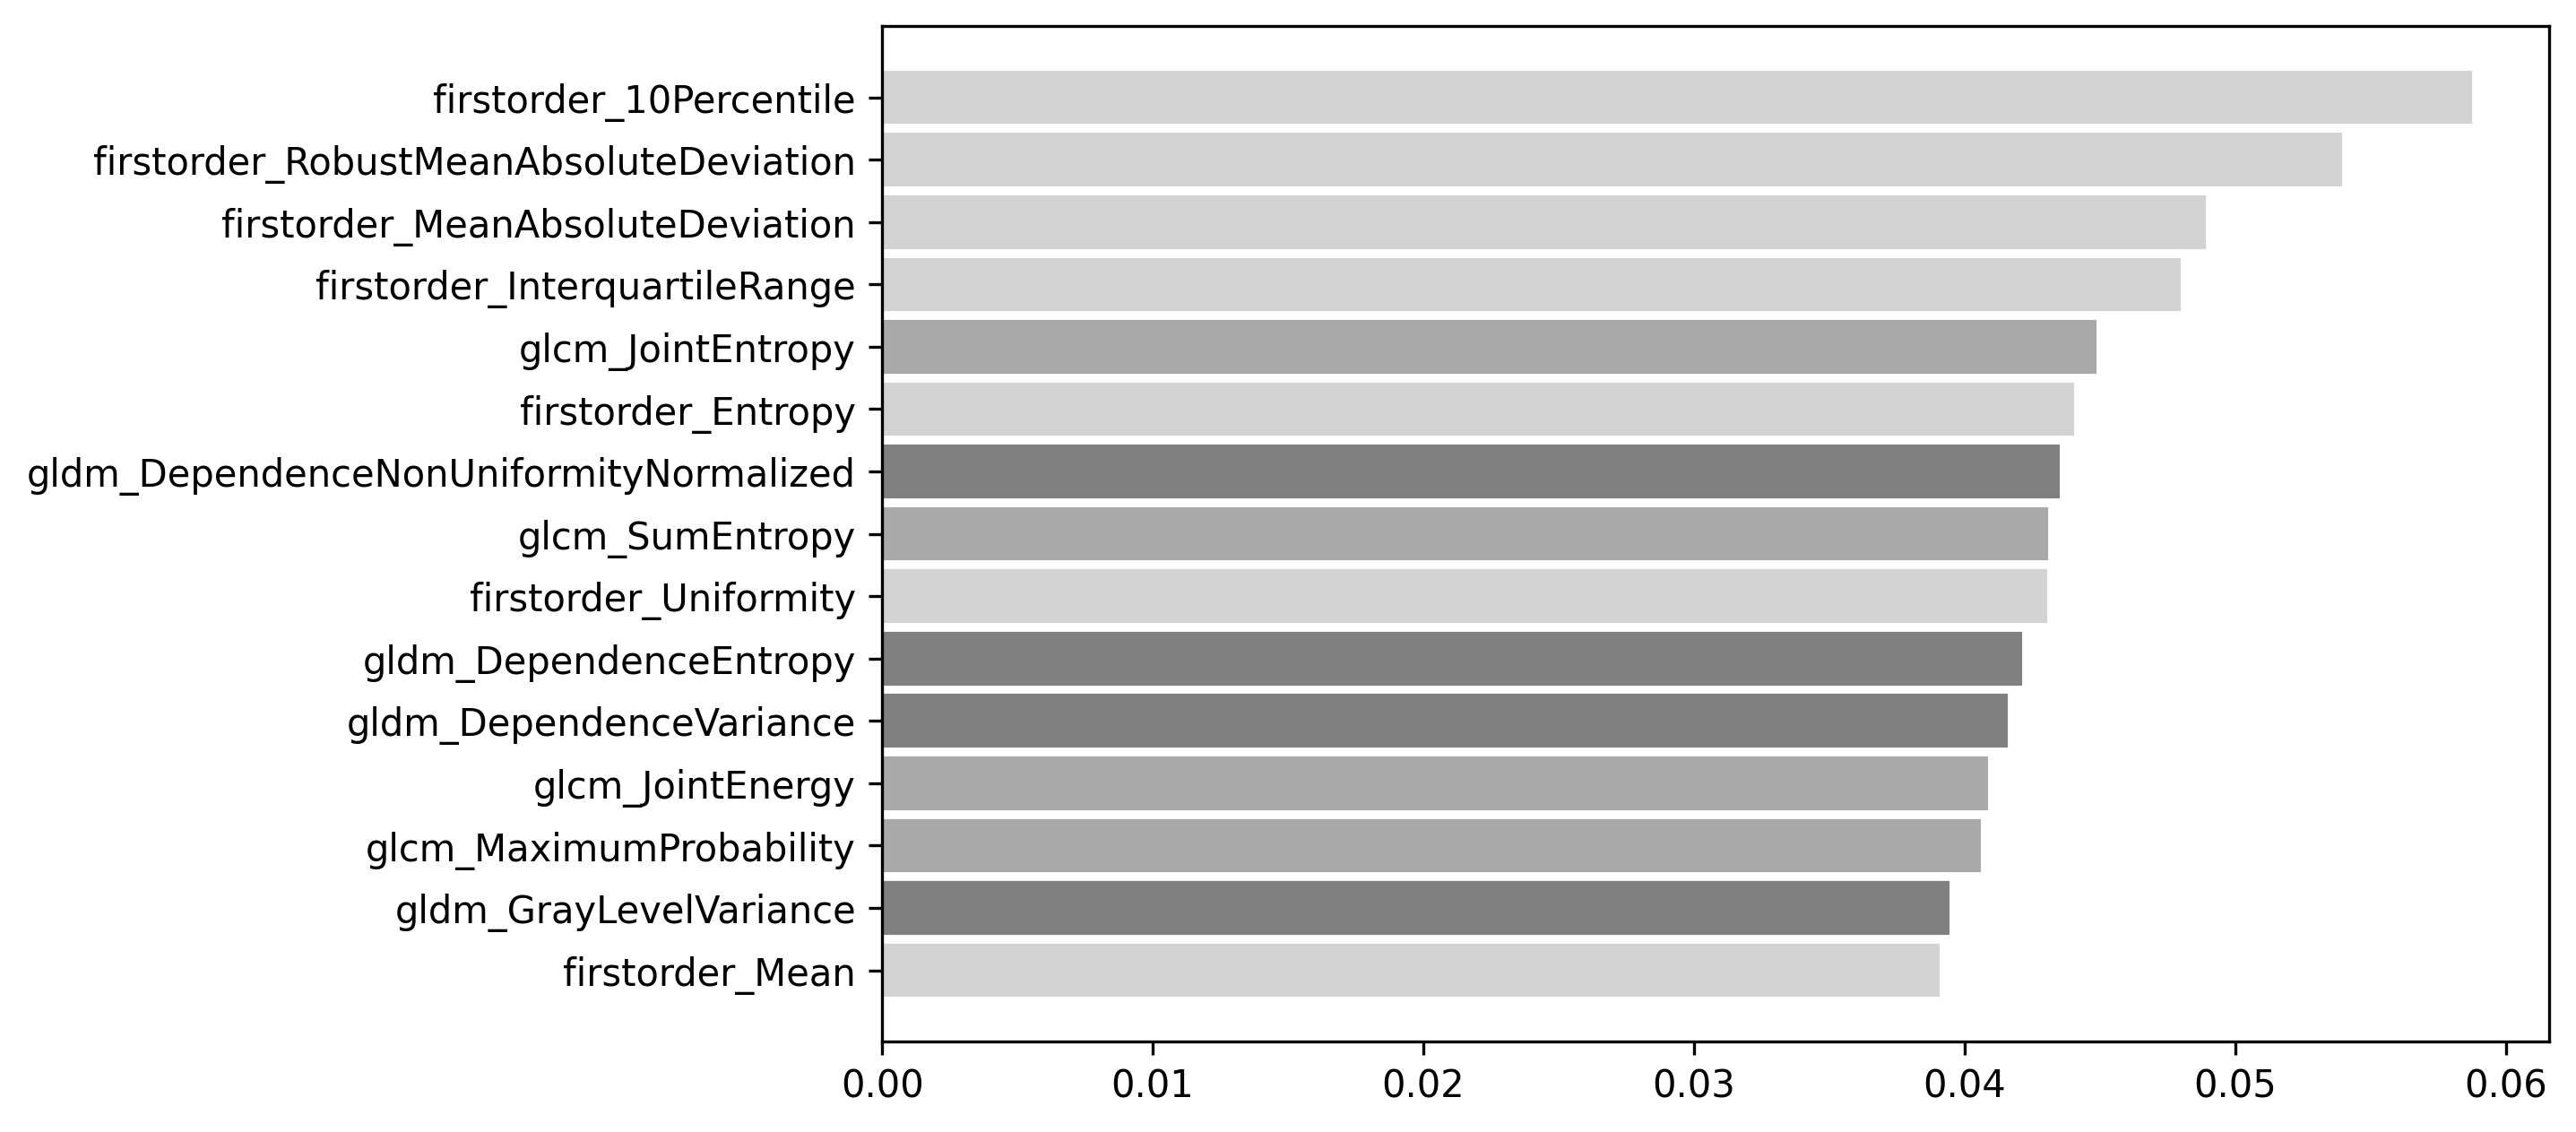

In [24]:
plt.figure(figsize = (8,5), dpi = 300)  #이미지 사이즈, 해상도 지정

index = np.arange(15)
bar=plt.barh(index,important_features_value_top15)
for i in range(15): # 특징 카테고리별로 다른 막대색 지정 
    if important_features_name_top15[i].startswith('firstorder'):
        bar[i].set_color('lightgray')
    elif important_features_name_top15[i].startswith('glcm'):
        bar[i].set_color('darkgray')
    elif important_features_name_top15[i].startswith('gldm'):
        bar[i].set_color('gray')
plt.yticks(index, important_features_name_top15, rotation=0)
plt.gca().invert_yaxis()
#plt.savefig('intratumoral_top15.jpg',bbox_inches='tight') # 이미지 저장
plt.show()

## 3. test data (20개 데이터)

In [25]:
best_image=[]
best_mask=[]
for x in os.listdir(os.path.join('./TCIA','best_image')):
    best_image.append(os.path.join('./TCIA','best_image',x))

for x in os.listdir(os.path.join('./TCIA','best_mask')):
    if ('Store' not in x):
        best_mask.append(os.path.join('./TCIA','best_mask',x))

In [26]:
best_patientId=[]
for i in range(len(best_mask)):
    best_patientId.append(best_image[i][-10:-7])

### 3-1. feature extraction[특징추출]

In [27]:
test_list=[]
for i in range(len(best_image)):
    featureName=[]
    featureValue=[]
    
    img = sitk.ReadImage(best_image[i])
    #image2d = sitk.JoinSeries(img)
    msk = sitk.ReadImage(best_mask[i])
    #mask2d = sitk.JoinSeries(msk)

    settings = {'label': 2}
    extractor = featureextractor.RadiomicsFeatureExtractor(force2D=True, force2Ddimension=0, additionalInfo=True,**settings)
    extractor.enableAllFeatures()
    result = extractor.execute(img, msk, label=255)
    
    for key, value in result.items():
        if (key.startswith('original')):
            featureName.append(key)
            featureValue.append(value)
    
    #column_value = pd.Series(featureValue)
    test=pd.DataFrame([featureValue], columns=featureName)
    test_list.append(test)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

In [28]:
patient_features=test_list[0]
for i in range(1,len(test_list)):
    patient_features=pd.concat([patient_features,test_list[i]])
patient_features

,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.530388,118.755143,123.82245353731285,5678.5,62.986328,388.55129855222145,0.06842498873861433,5679.0,0.687501,228.0,...,4.623704105698914,0.019434290810545547,5.402831438531505,0.07061102306744145,544.3652464847855,1.393636402491799,0.010885462090645096,1.239220949315655,0.0011808089828581607,0.3560105718539682
0,0.489610,148.410853,155.90060936378666,8046.5,72.663470,444.30865786510213,0.05521762976015686,8047.0,0.715688,211.0,...,6.026849313093829,0.008230169039874233,5.594005957047829,0.07145520069591152,641.7964945179583,1.4676650768202688,0.007862510131030436,1.8083770273704032,0.0011680601984726303,0.3690051715402778
0,0.720079,146.372520,164.62381358722072,11610.5,105.399753,516.7939392393408,0.04451091160926238,11611.0,0.739117,230.0,...,8.201967867133327,0.013575482734035393,5.714659668197702,0.0812160881922315,490.1704292048684,3.191808875675242,0.003473116475183116,2.6089097090123174,0.001662695700238318,0.20392707304961358
0,0.540067,69.735137,70.77428911688199,1886.5,37.661614,201.7401153701779,0.1069388366658775,1887.0,0.763205,92.0,...,4.315294697146275,0.05581565580539674,5.393154564515549,0.22257551669316375,14.78328231292517,3.2153809781140232,0.013214146910221531,5.916920020502329,0.05628069050315926,0.5156427775023601
0,0.667015,132.701080,135.09256086106296,8782.5,88.513585,424.65180361560977,0.048352041402289755,8783.0,0.782314,223.0,...,5.3288740598965765,0.00798550518081322,4.8077618010966185,0.10110440623932597,183.58829310729652,5.650739003826229,0.0026314799970218704,2.477469683456453,0.0008109711539540038,0.13395316996742562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.581524,53.898848,59.135437767890075,1131.5,31.343469,187.49747468305853,0.1657070036969143,1132.0,0.635970,218.0,...,1.8789168186551546,0.03164747169559852,4.611358365637502,0.11130742049469965,95.65054169816075,0.8246693794506611,0.034910257201011534,0.915450593742811,0.0026960671281909122,0.6504305875880748
0,0.674097,173.340381,181.738823590338,15402.5,116.848202,526.0660171779829,0.03415458640986742,15403.0,0.836297,229.0,...,2.164630415783305,0.026116832126894186,5.8734083450024634,0.030188924235538532,1931.971538906232,2.644446336801754,0.007873098109853309,0.3581398006369939,0.00018242386731733348,0.18187347279421381
0,0.321134,145.237324,146.1642911247477,5096.5,46.640590,377.43860018001305,0.07405839305013501,5097.0,0.670494,216.0,...,4.992170135837114,0.013925511691767721,5.46614687889974,0.12026682362173828,102.59092155020771,3.0330408493375782,0.005393382551344007,2.5598118364314013,0.002771442332220192,0.19761588152798668
0,0.763587,53.759445,57.723478758647246,1655.5,41.049992,181.49747468305853,0.10963302608460194,1656.0,0.794692,181.0,...,4.70040602084183,0.02481392441498627,4.7526036382749695,0.17753623188405798,57.91947799527975,1.291214278999812,0.015069957911500398,3.4488667901260452,0.010059642624872477,0.3432276731509469


In [29]:
patient_features['PatientID']=best_patientId
patient_features_df=patient_features.set_index('PatientID')

In [30]:
patient_features_df.columns=patient_features_df.columns.str.replace('original','intra')
patient_features_intra=patient_features_df.astype(float)
patient_features_intra 

,intra_shape2D_Elongation,intra_shape2D_MajorAxisLength,intra_shape2D_MaximumDiameter,intra_shape2D_MeshSurface,intra_shape2D_MinorAxisLength,intra_shape2D_Perimeter,intra_shape2D_PerimeterSurfaceRatio,intra_shape2D_PixelSurface,intra_shape2D_Sphericity,intra_firstorder_10Percentile,...,intra_glszm_SmallAreaHighGrayLevelEmphasis,intra_glszm_SmallAreaLowGrayLevelEmphasis,intra_glszm_ZoneEntropy,intra_glszm_ZonePercentage,intra_glszm_ZoneVariance,intra_ngtdm_Busyness,intra_ngtdm_Coarseness,intra_ngtdm_Complexity,intra_ngtdm_Contrast,intra_ngtdm_Strength
PatientID,,,,,,,,,,,,,,,,,,,,,
099,0.530388,118.755143,123.822454,5678.5,62.986328,388.551299,0.068425,5679.0,0.687501,228.0,...,4.623704,0.019434,5.402831,0.070611,544.365246,1.393636,0.010885,1.239221,0.001181,0.356011
239,0.489610,148.410853,155.900609,8046.5,72.663470,444.308658,0.055218,8047.0,0.715688,211.0,...,6.026849,0.008230,5.594006,0.071455,641.796495,1.467665,0.007863,1.808377,0.001168,0.369005
173,0.720079,146.372520,164.623814,11610.5,105.399753,516.793939,0.044511,11611.0,0.739117,230.0,...,8.201968,0.013575,5.714660,0.081216,490.170429,3.191809,0.003473,2.608910,0.001663,0.203927
061,0.540067,69.735137,70.774289,1886.5,37.661614,201.740115,0.106939,1887.0,0.763205,92.0,...,4.315295,0.055816,5.393155,0.222576,14.783282,3.215381,0.013214,5.916920,0.056281,0.515643
285,0.667015,132.701080,135.092561,8782.5,88.513585,424.651804,0.048352,8783.0,0.782314,223.0,...,5.328874,0.007986,4.807762,0.101104,183.588293,5.650739,0.002631,2.477470,0.000811,0.133953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.581524,53.898848,59.135438,1131.5,31.343469,187.497475,0.165707,1132.0,0.635970,218.0,...,1.878917,0.031647,4.611358,0.111307,95.650542,0.824669,0.034910,0.915451,0.002696,0.650431
105,0.674097,173.340381,181.738824,15402.5,116.848202,526.066017,0.034155,15403.0,0.836297,229.0,...,2.164630,0.026117,5.873408,0.030189,1931.971539,2.644446,0.007873,0.358140,0.000182,0.181873
005,0.321134,145.237324,146.164291,5096.5,46.640590,377.438600,0.074058,5097.0,0.670494,216.0,...,4.992170,0.013926,5.466147,0.120267,102.590922,3.033041,0.005393,2.559812,0.002771,0.197616


In [31]:
patient_features_intra_test=pd.merge(testing_data,patient_features_intra,on='PatientID') # 앞에서 지정한 training_data의 PatientID와 merge
patient_features_intra_test

,recurrence,intra_shape2D_Elongation,intra_shape2D_MajorAxisLength,intra_shape2D_MaximumDiameter,intra_shape2D_MeshSurface,intra_shape2D_MinorAxisLength,intra_shape2D_Perimeter,intra_shape2D_PerimeterSurfaceRatio,intra_shape2D_PixelSurface,intra_shape2D_Sphericity,...,intra_glszm_SmallAreaHighGrayLevelEmphasis,intra_glszm_SmallAreaLowGrayLevelEmphasis,intra_glszm_ZoneEntropy,intra_glszm_ZonePercentage,intra_glszm_ZoneVariance,intra_ngtdm_Busyness,intra_ngtdm_Coarseness,intra_ngtdm_Complexity,intra_ngtdm_Contrast,intra_ngtdm_Strength
PatientID,,,,,,,,,,,,,,,,,,,,,
005,1,0.321134,145.237324,146.164291,5096.5,46.640590,377.438600,0.074058,5097.0,0.670494,...,4.992170,0.013926,5.466147,0.120267,102.590922,3.033041,0.005393,2.559812,0.002771,0.197616
006,1,0.572172,133.323074,129.027129,7247.5,76.283731,482.693434,0.066601,7248.0,0.625213,...,8.022373,0.023185,5.650922,0.208471,50.371029,3.292700,0.004410,6.507637,0.035583,0.146869
030,1,0.437281,121.247909,117.902502,4322.5,53.019368,376.752309,0.087161,4323.0,0.618609,...,7.011237,0.026927,5.442574,0.168402,56.656893,2.254514,0.006021,4.463009,0.011706,0.250278
042,1,0.834098,126.282665,139.262342,10324.5,105.332089,445.036580,0.043105,10325.0,0.809364,...,4.331784,0.018232,5.364433,0.057046,1143.457946,2.014534,0.007545,0.991025,0.001392,0.209578
045,0,0.290531,136.410237,135.594985,3289.5,39.631351,403.823376,0.122761,3290.0,0.503476,...,3.131523,0.029049,5.059395,0.124316,87.714445,2.110561,0.011304,1.369382,0.002964,0.192885
047,0,0.497265,88.181886,91.268834,2798.5,43.849766,273.882251,0.097868,2799.0,0.684705,...,4.943781,0.022207,5.107562,0.246874,14.629851,3.130580,0.009290,4.201806,0.037647,0.178073
063,0,0.757860,56.242505,57.974132,1792.5,42.623917,184.083261,0.102696,1793.0,0.815305,...,3.371776,0.012004,4.724790,0.064138,327.302533,0.324322,0.038875,1.199697,0.001005,2.068465
096,1,0.582015,166.245222,169.189243,11614.5,96.757204,512.793939,0.044151,11615.0,0.745010,...,7.213574,0.013764,5.615294,0.105295,402.729141,1.915978,0.005081,3.522689,0.007644,0.198102
123,1,0.549730,121.774067,127.906216,6144.5,66.942840,372.166522,0.060569,6145.0,0.746639,...,4.689622,0.026302,5.086370,0.092270,310.728523,1.140882,0.012254,1.617263,0.005195,0.317747


### 3-2. feature selection[특징선택] - ReliefF 사용(train과 동일한 변수 순서 적용)

In [32]:
# reliefF_list를 이용해서 train의 특징값 중요도 순서로 데이터 재정렬
patient_features_intra_test=patient_features_intra_test[reliefF_list]
patient_features_intra_test

,intra_firstorder_10Percentile,intra_firstorder_RobustMeanAbsoluteDeviation,intra_firstorder_MeanAbsoluteDeviation,intra_firstorder_InterquartileRange,intra_glcm_JointEntropy,intra_firstorder_Entropy,intra_gldm_DependenceNonUniformityNormalized,intra_glcm_SumEntropy,intra_firstorder_Uniformity,intra_gldm_DependenceEntropy,...,intra_glszm_GrayLevelNonUniformity,intra_glrlm_LongRunHighGrayLevelEmphasis,intra_glszm_LargeAreaHighGrayLevelEmphasis,intra_glrlm_LongRunEmphasis,intra_glszm_LargeAreaEmphasis,intra_glrlm_LongRunLowGrayLevelEmphasis,intra_glszm_LargeAreaLowGrayLevelEmphasis,intra_ngtdm_Busyness,intra_shape2D_Elongation,recurrence
PatientID,,,,,,,,,,,,,,,,,,,,,
005,216.0,6.113426,11.502419,14.00,1.692196,1.223053,0.641084,1.536160,0.586309,1.929795,...,174.132137,6040.047308,6040.047308,171.727569,171.727569,5.032538,5.032538,3.033041,0.321134,1
006,99.0,38.762735,50.060614,90.00,3.550693,2.580647,0.505011,3.121539,0.253428,3.480407,...,187.939775,4321.093316,4321.093316,73.380543,73.380543,2.990132,2.990132,3.292700,0.572172,1
030,186.0,9.671757,22.150999,19.50,2.554708,1.852613,0.555030,2.292216,0.411292,2.678433,...,142.357143,4445.131868,4445.131868,91.918956,91.918956,2.417148,2.417148,2.254514,0.437281,1
042,226.0,3.329783,9.458135,7.00,0.976124,0.761863,0.804361,0.899854,0.793335,1.071575,...,117.047538,52140.120543,52140.120543,1450.748727,1450.748727,41.023647,41.023647,2.014534,0.834098,1
045,207.0,4.696030,10.467795,8.00,1.495275,1.123687,0.635903,1.377701,0.623508,1.778120,...,109.709046,3738.173594,3738.173594,152.420538,152.420538,6.430153,6.430153,2.110561,0.290531,0
047,125.0,34.445385,40.125214,87.00,3.496558,2.515687,0.478368,3.160634,0.198562,3.528714,...,117.958032,1053.269175,1053.269175,31.037627,31.037627,2.163028,2.163028,3.130580,0.497265,0
063,227.0,2.417465,7.698029,4.00,0.777071,0.581961,0.781251,0.708592,0.836422,0.996161,...,38.095652,27859.991304,27859.991304,570.391304,570.391304,11.988826,11.988826,0.324322,0.757860,0
096,157.0,13.468700,27.929567,18.00,2.020580,1.545337,0.676286,1.825781,0.546365,2.062192,...,193.107931,31131.557645,31131.557645,492.924775,492.924775,9.391714,9.391714,1.915978,0.582015,1
123,185.0,5.682038,17.830396,6.00,1.450733,1.124756,0.707664,1.309963,0.667582,1.567746,...,102.449735,20798.358025,20798.358025,428.185185,428.185185,9.171644,9.171644,1.140882,0.549730,1


In [40]:
patient_features_intra_test.to_csv("patient_features_intra_test.csv", index=True)

## 4. classification[분류모델 학습] & evaluation[성능평가]

In [28]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier

### 4-1. 하이퍼파라미터 설정

In [58]:
#LDA

solver = ['lsqr', 'eigen','svd']
shrinkage = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
for i in range(20,81,20): # 특징 중요도 순서로 20,40,60,80,102개 cut해서 성능평가 
    print("-----------------------reliefF",i,"---------------------")
    for a in solver:
        for b in shrinkage:
            X_train=patient_features_intra_train.drop('recurrence',axis=1).iloc[:,:i].values
            y_train=patient_features_intra_train['recurrence'].values
            X_test=patient_features_intra_test.drop('recurrence',axis=1).iloc[:,:i].values
            y_test=patient_features_intra_test['recurrence'].values
            
            if a=='svd': # solver='svd'면 shrinkage 파라미더 지정 불가 이므로
                lda=LinearDiscriminantAnalysis(solver=a)
            else:
                lda=LinearDiscriminantAnalysis(solver=a, shrinkage=b)
            clf = make_pipeline(StandardScaler(), lda) 
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            # 성능평가
            accuracy = metrics.accuracy_score(y_test, y_pred)
            sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
            specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
            ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
            npv = metrics.precision_score(y_test, y_pred, pos_label=0)
            if accuracy>0.7: # accuracy 70% 초과만 파라미터&성능 출력
                print("solv:",a,",shrink:",b,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

print("-----------------------reliefF102---------------------")
for a in solver:
    for b in shrinkage:
        X_train=patient_features_intra_train.drop('recurrence',axis=1).values
        y_train=patient_features_intra_train['recurrence'].values
        X_test=patient_features_intra_test.drop('recurrence',axis=1).values
        y_test=patient_features_intra_test['recurrence'].values

        if a=='svd':
            lda=LinearDiscriminantAnalysis(solver=a)
        else:
            lda=LinearDiscriminantAnalysis(solver=a, shrinkage=b)
        clf = make_pipeline(StandardScaler(), lda)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
        specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
        ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
        npv = metrics.precision_score(y_test, y_pred, pos_label=0)
        if accuracy>0.7:
            print("solv:",a,",shrink:",b,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

-----------------------reliefF 20 ---------------------
-----------------------reliefF 40 ---------------------
-----------------------reliefF 60 ---------------------
solv: svd ,shrink: 0.1 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: svd ,shrink: 0.2 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: svd ,shrink: 0.3 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: svd ,shrink: 0.4 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: svd ,shrink: 0.5 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: svd ,shrink: 0.6 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: svd ,shrink: 0.7 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
solv: 

In [29]:
#SVM

C_set = [0.1,1, 10, 50, 100]
kernel_set = ["rbf"]
gamma_set = [0.001, 0.01, 0.1,0.5, 1]

for i in range(20,81,20):
    print("-----------------------reliefF",i,"---------------------")
    for a in C_set:
        for b in kernel_set:
            for c in gamma_set:
                X_train=patient_features_intra_train.drop('recurrence',axis=1).iloc[:,:i].values
                y_train=patient_features_intra_train['recurrence'].values
                X_test=patient_features_intra_test.drop('recurrence',axis=1).iloc[:,:i].values
                y_test=patient_features_intra_test['recurrence'].values

                clf = make_pipeline(StandardScaler(), SVC(C=a,kernel=b,gamma=c,random_state=42))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)

                accuracy = metrics.accuracy_score(y_test, y_pred)
                sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
                specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
                ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
                npv = metrics.precision_score(y_test, y_pred, pos_label=0)
                if accuracy>0.7:
                    print("c:",a,",k:",b,",g:",c,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

print("-----------------------reliefF102---------------------")
for a in C_set:
    for b in kernel_set:
        for c in gamma_set:
            X_train=patient_features_intra_train.drop('recurrence',axis=1).values
            y_train=patient_features_intra_train['recurrence'].values
            X_test=patient_features_intra_test.drop('recurrence',axis=1).values
            y_test=patient_features_intra_test['recurrence'].values

            clf = make_pipeline(StandardScaler(), SVC(C=a,kernel=b,gamma=c,random_state=42))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            accuracy = metrics.accuracy_score(y_test, y_pred)
            sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
            specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
            ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
            npv = metrics.precision_score(y_test, y_pred, pos_label=0)
            if accuracy>0.7:
                print("c:",a,",k:",b,",g",c,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

-----------------------reliefF 20 ---------------------
-----------------------reliefF 40 ---------------------
-----------------------reliefF 60 ---------------------
-----------------------reliefF 80 ---------------------
c: 50 ,k: rbf ,g 0.01 / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
-----------------------reliefF106---------------------


In [31]:
#RF

n_estimators = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
max_depth = [None,2,4,6,8,10,12,14,16]
max_features_set = ["sqrt", "log2", "auto", None]

for i in range(20,81,20):
    print("-----------------------reliefF",i,"---------------------")
    for a in n_estimators:
        for b in max_depth:
            for c in max_features_set:
                X_train=patient_features_intra_train.drop('recurrence',axis=1).iloc[:,:i].values
                y_train=patient_features_intra_train['recurrence'].values
                X_test=patient_features_intra_test.drop('recurrence',axis=1).iloc[:,:i].values
                y_test=patient_features_intra_test['recurrence'].values

                clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=a,max_depth=b,max_features=c,random_state=42))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)

                accuracy = metrics.accuracy_score(y_test, y_pred)
                sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
                specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
                ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
                npv = metrics.precision_score(y_test, y_pred, pos_label=0)
                if accuracy>0.7:
                    print("n_e:",a,",m_d:",b,",m_f",c,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

print("-----------------------reliefF102---------------------")
for a in n_estimators:
    for b in max_depth:
        for c in max_features_set:
            X_train=patient_features_intra_train.drop('recurrence',axis=1).values
            y_train=patient_features_intra_train['recurrence'].values
            X_test=patient_features_intra_test.drop('recurrence',axis=1).values
            y_test=patient_features_intra_test['recurrence'].values

            clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=a,max_depth=b,max_features=c,random_state=42))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            accuracy = metrics.accuracy_score(y_test, y_pred)
            sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
            specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
            ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
            npv = metrics.precision_score(y_test, y_pred, pos_label=0)
            if accuracy>0.7:
                print("n_e:",a,",m_d:",b,",m_f",c,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

-----------------------reliefF 20 ---------------------
-----------------------reliefF 40 ---------------------
-----------------------reliefF 60 ---------------------
-----------------------reliefF 80 ---------------------
-----------------------reliefF106---------------------
n_e: 60 ,m_d: None ,m_f None / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
n_e: 60 ,m_d: 12 ,m_f None / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
n_e: 60 ,m_d: 14 ,m_f None / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
n_e: 60 ,m_d: 16 ,m_f None / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
n_e: 80 ,m_d: None ,m_f None / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.6666666666666666
n_e: 80 ,m_d: 10 ,m_f None / 0.75 ,  0.8461538461538461 ,  0.5714285714285714 ,  0.7857142857142857 ,  0.66

In [33]:
#GB

n_estimators = [1,10,50, 100]
learning_rate = [0.1,0.3,0.5,0.6, 0.7,0.8,0.9]
subsample = [0.6,0.7,0.8,0.9,1.0]
max_depth = range(3,10,2)
    
for i in range(20,81,20):
    print("-----------------------reliefF",i,"---------------------")
    for a in n_estimators:
        for b in learning_rate:
            for c in subsample:
                for d in max_depth:
                    X_train=patient_features_intra_train.drop('recurrence',axis=1).iloc[:,:i].values
                    y_train=patient_features_intra_train['recurrence'].values
                    X_test=patient_features_intra_test.drop('recurrence',axis=1).iloc[:,:i].values
                    y_test=patient_features_intra_test['recurrence'].values

                    clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=a,learning_rate=b, subsample=c,max_depth=d,random_state=42))
                    clf.fit(X_train, y_train)
                    y_pred = clf.predict(X_test)

                    accuracy = metrics.accuracy_score(y_test, y_pred)
                    sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
                    specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
                    ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
                    npv = metrics.precision_score(y_test, y_pred, pos_label=0)
                    if accuracy>0.8:
                        print("n_e:",a,", l_r:",b,",s",c,",m_d",d,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)

print("-----------------------reliefF102---------------------")
for a in n_estimators:
    for b in learning_rate:
        for c in subsample:
            for d in max_depth:
                X_train=patient_features_intra_train.drop('recurrence',axis=1).values
                y_train=patient_features_intra_train['recurrence'].values
                X_test=patient_features_intra_test.drop('recurrence',axis=1).values
                y_test=patient_features_intra_test['recurrence'].values

                clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=a,learning_rate=b, subsample=c,max_depth=d,random_state=42))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)

                accuracy = metrics.accuracy_score(y_test, y_pred)
                sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
                specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
                ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
                npv = metrics.precision_score(y_test, y_pred, pos_label=0)
                if accuracy>0.8:
                    print("n_e:",a,", l_r:",b,",s",c,",m_d",d,"/",accuracy,', ',sensitivity,', ',specificity,', ',ppv,', ',npv)


-----------------------reliefF 20 ---------------------
-----------------------reliefF 40 ---------------------
-----------------------reliefF 60 ---------------------
-----------------------reliefF 80 ---------------------
-----------------------reliefF106---------------------
n_e: 50 , l_r: 0.8 ,s 0.7 ,m_d 5 / 0.85 ,  0.9230769230769231 ,  0.7142857142857143 ,  0.8571428571428571 ,  0.8333333333333334
n_e: 100 , l_r: 0.8 ,s 0.6 ,m_d 3 / 0.85 ,  0.8461538461538461 ,  0.8571428571428571 ,  0.9166666666666666 ,  0.75


### best hyper-parameter (Intra-tumoral)  
- LDA_102 : LinearDiscriminantAnalysis(solver='svd')  
- SVM_80 : SVC(C=50,kernel='rbf',gamma=0.01)  
- RF_102 : RandomForestClassifier(n_estimators=80,max_depth=12,max_features=None)
- GB_102 : GradientBoostingClassifier(n_estimators=50,learning_rate=0.8, subsample=0.7,max_depth=5)

### 4-2. 오분류 사항 체크

In [37]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

In [43]:
# LDA

X_train=patient_features_intra_train.drop('recurrence',axis=1).values
y_train=patient_features_intra_train['recurrence'].values
X_test=patient_features_intra_test.drop('recurrence',axis=1).values
y_test=patient_features_intra_test['recurrence'].values

model=LinearDiscriminantAnalysis(solver='svd')

clf = make_pipeline(StandardScaler(), model)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
npv = metrics.precision_score(y_test, y_pred, pos_label=0)
tn, fp, fn, tp = get_confusion_matrix_values(y_test, y_pred)

TP,FN,FP,TN =[],[],[],[]

for i in range(len(y_test)):
    if (y_pred[i]==1) and (y_test[i]==1) :
        TP.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==1) and (y_test[i]==0):
        FP.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==1):
        FN.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==0):
        TN.append(patient_features_intra_test.index[i])

print(accuracy,',',sensitivity,',',specificity,',',ppv,',',npv)    
print("TP (%s개):"%tp,TP)
print("FP (%s개):"%fp,FP)
print("FN (%s개):"%fn,FN)
print("TN (%s개):"%tn,TN)

0.75 , 0.7692307692307693 , 0.7142857142857143 , 0.8333333333333334 , 0.625
TP (10개): ['005', '030', '042', '096', '123', '155', '173', '210', '242', '268']
FP (2개): ['263', '276']
FN (3개): ['006', '202', '252']
TN (5개): ['045', '047', '063', '130', '258']


In [45]:
# SVM

X_train=patient_features_intra_train.drop('recurrence',axis=1).iloc[:,:80].values
y_train=patient_features_intra_train['recurrence'].values
X_test=patient_features_intra_test.drop('recurrence',axis=1).iloc[:,:80].values
y_test=patient_features_intra_test['recurrence'].values

model=SVC(C=50,kernel='rbf',gamma=0.01,random_state=42)

clf = make_pipeline(StandardScaler(), model)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
npv = metrics.precision_score(y_test, y_pred, pos_label=0)
tn, fp, fn, tp = get_confusion_matrix_values(y_test, y_pred)

TP,FN,FP,TN =[],[],[],[]

for i in range(len(y_test)):
    if (y_pred[i]==1) and (y_test[i]==1) :
        TP.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==1) and (y_test[i]==0):
        FP.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==1):
        FN.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==0):
        TN.append(patient_features_intra_test.index[i])

print(accuracy,',',sensitivity,',',specificity,',',ppv,',',npv)    
print("TP (%s개):"%tp,TP)
print("FP (%s개):"%fp,FP)
print("FN (%s개):"%fn,FN)
print("TN (%s개):"%tn,TN)

0.75 , 0.8461538461538461 , 0.5714285714285714 , 0.7857142857142857 , 0.6666666666666666
TP (11개): ['005', '006', '030', '042', '096', '123', '155', '173', '210', '242', '268']
FP (3개): ['063', '263', '276']
FN (2개): ['202', '252']
TN (4개): ['045', '047', '130', '258']


In [46]:
# RF

X_train=patient_features_intra_train.drop('recurrence',axis=1).values
y_train=patient_features_intra_train['recurrence'].values
X_test=patient_features_intra_test.drop('recurrence',axis=1).values
y_test=patient_features_intra_test['recurrence'].values

model=RandomForestClassifier(n_estimators=80,max_depth=12,max_features=None,random_state=42)

clf = make_pipeline(StandardScaler(), model)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
npv = metrics.precision_score(y_test, y_pred, pos_label=0)
tn, fp, fn, tp = get_confusion_matrix_values(y_test, y_pred)

TP,FN,FP,TN =[],[],[],[]

for i in range(len(y_test)):
    if (y_pred[i]==1) and (y_test[i]==1) :
        TP.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==1) and (y_test[i]==0):
        FP.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==1):
        FN.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==0):
        TN.append(patient_features_intra_test.index[i])

print(accuracy,',',sensitivity,',',specificity,',',ppv,',',npv)    
print("TP (%s개):"%tp,TP)
print("FP (%s개):"%fp,FP)
print("FN (%s개):"%fn,FN)
print("TN (%s개):"%tn,TN)

0.75 , 0.8461538461538461 , 0.5714285714285714 , 0.7857142857142857 , 0.6666666666666666
TP (11개): ['005', '006', '030', '042', '096', '123', '155', '173', '210', '242', '268']
FP (3개): ['063', '263', '276']
FN (2개): ['202', '252']
TN (4개): ['045', '047', '130', '258']


In [48]:
# GB

X_train=patient_features_intra_train.drop('recurrence',axis=1).values
y_train=patient_features_intra_train['recurrence'].values
X_test=patient_features_intra_test.drop('recurrence',axis=1).values
y_test=patient_features_intra_test['recurrence'].values

model=GradientBoostingClassifier(n_estimators=50,learning_rate=0.8, subsample=0.7,max_depth=5,random_state=42)

clf = make_pipeline(StandardScaler(), model)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
ppv = metrics.precision_score(y_test, y_pred, pos_label=1)
npv = metrics.precision_score(y_test, y_pred, pos_label=0)
tn, fp, fn, tp = get_confusion_matrix_values(y_test, y_pred)

TP,FN,FP,TN =[],[],[],[]

for i in range(len(y_test)):
    if (y_pred[i]==1) and (y_test[i]==1) :
        TP.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==1) and (y_test[i]==0):
        FP.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==1):
        FN.append(patient_features_intra_test.index[i])
    elif (y_pred[i]==0) and (y_test[i]==0):
        TN.append(patient_features_intra_test.index[i])

print(accuracy,',',sensitivity,',',specificity,',',ppv,',',npv)    
print("TP (%s개):"%tp,TP)
print("FP (%s개):"%fp,FP)
print("FN (%s개):"%fn,FN)
print("TN (%s개):"%tn,TN)

0.85 , 0.9230769230769231 , 0.7142857142857143 , 0.8571428571428571 , 0.8333333333333334
TP (12개): ['005', '006', '030', '042', '096', '123', '155', '173', '210', '242', '252', '268']
FP (2개): ['063', '276']
FN (1개): ['202']
TN (5개): ['045', '047', '130', '258', '263']


### 4-3. 오분류 데이터 특징 확인

- 가장 성능이 좋은 'GB_102'의 결과로 분석

In [50]:
a=pd.read_csv('./label.csv',sep=',')
a=a[['PatientID','recurrence','diameter']]
a=pd.DataFrame(a)
a

,PatientID,recurrence,diameter
0,LUNG1-004,1,120
1,LUNG1-005,1,145
2,LUNG1-006,1,128
3,LUNG1-007,1,63
4,LUNG1-008,1,98
...,...,...,...
95,LUNG1-285,1,134
96,LUNG1-288,1,25
97,LUNG1-290,1,159
98,LUNG1-292,1,132


In [56]:
TP=['LUNG1-005','LUNG1-006', 'LUNG1-030', 'LUNG1-042', 'LUNG1-096', 'LUNG1-123', 'LUNG1-155', 'LUNG1-173', 'LUNG1-210', 'LUNG1-242','LUNG1-252', 'LUNG1-268']
TN=['LUNG1-045', 'LUNG1-047', 'LUNG1-130', 'LUNG1-258','LUNG1-263']
FP=['LUNG1-063', 'LUNG1-276']
FN=['LUNG1-202']

In [57]:
print("[분류별 종양길이 평균]")
print("정상분류된 재발환자(TP):",a[a['PatientID'].isin(TP)]['diameter'].mean())
print("정상분류된 비재발환자(TN):",a[a['PatientID'].isin(TN)]['diameter'].mean())
print("오분류된 비재발환자(FP):",a[a['PatientID'].isin(FP)]['diameter'].mean())
print("오분류된 재발환자(FN):",a[a['PatientID'].isin(FN)]['diameter'].mean())

[분류별 종양길이 평균]
정상분류된 재발환자(TP): 115.16666666666667
정상분류된 비재발환자(TN): 119.2
오분류된 비재발환자(FP): 126.0
오분류된 재발환자(FN): 40.0
